In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import glob
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# load in the data
data_60s = pd.read_csv('spotify-data/dataset-of-60s.csv')
data_70s = pd.read_csv('spotify-data/dataset-of-70s.csv')
data_80s = pd.read_csv('spotify-data/dataset-of-80s.csv')
data_90s = pd.read_csv('spotify-data/dataset-of-90s.csv')
data_00s = pd.read_csv('spotify-data/dataset-of-00s.csv')
data_10s = pd.read_csv('spotify-data/dataset-of-10s.csv')

In [3]:
# combined all data into a single dataframe
data_all = pd.concat([data_00s, data_10s, data_60s, data_70s, data_80s, data_90s])

In [4]:
# print the first 5 samples
data_all.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [5]:
# print information of the dataframe
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 5519
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

In [6]:
# print count of target where 1 is a hit and 0 is a flop
data_all['target'].value_counts()

1    20553
0    20553
Name: target, dtype: int64

In [7]:
# print count of features columns with null values
data_all.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [8]:
def run_spearmanr(a):
    r = stats.spearmanr(a=data_all[a], b=data_all['target'])
    print(30*"-")
    print(f"{a}")
    print("   Correlation: {:f}".format(r.correlation))
    print('   P-value: {:f}'.format(r.pvalue))

In [9]:
print(f'Spearmanr results for correlation between columns and song success')

removed_cols = data_all.drop(columns=['target', 'uri'])
for col in removed_cols:
    run_spearmanr(col)

Spearmanr results for correlation between columns and song success
------------------------------
track
   Correlation: 0.022619
   P-value: 0.000005
------------------------------
artist
   Correlation: 0.005745
   P-value: 0.244102
------------------------------
danceability
   Correlation: 0.339076
   P-value: 0.000000
------------------------------
energy
   Correlation: 0.148342
   P-value: 0.000000
------------------------------
key
   Correlation: 0.009441
   P-value: 0.055614
------------------------------
loudness
   Correlation: 0.247604
   P-value: 0.000000
------------------------------
mode
   Correlation: 0.079614
   P-value: 0.000000
------------------------------
speechiness
   Correlation: -0.130185
   P-value: 0.000000
------------------------------
acousticness
   Correlation: -0.168019
   P-value: 0.000000
------------------------------
instrumentalness
   Correlation: -0.420482
   P-value: 0.000000
------------------------------
liveness
   Correlation: -0.055092
 

/Users/peterhartmann/Workspace/aai/ai-exam/aai-exam-spotify-hits/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [10]:
y = data_all['target']
X = data_all.drop(['track', 'artist', 'uri', 'target'], axis=1)

In [11]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: target, dtype: int64

In [12]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 2476 to 461
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      32884 non-null  float64
 1   energy            32884 non-null  float64
 2   key               32884 non-null  int64  
 3   loudness          32884 non-null  float64
 4   mode              32884 non-null  int64  
 5   speechiness       32884 non-null  float64
 6   acousticness      32884 non-null  float64
 7   instrumentalness  32884 non-null  float64
 8   liveness          32884 non-null  float64
 9   valence           32884 non-null  float64
 10  tempo             32884 non-null  float64
 11  duration_ms       32884 non-null  int64  
 12  time_signature    32884 non-null  int64  
 13  chorus_hit        32884 non-null  float64
 14  sections          32884 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 4.0 MB


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8222 entries, 1903 to 1618
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      8222 non-null   float64
 1   energy            8222 non-null   float64
 2   key               8222 non-null   int64  
 3   loudness          8222 non-null   float64
 4   mode              8222 non-null   int64  
 5   speechiness       8222 non-null   float64
 6   acousticness      8222 non-null   float64
 7   instrumentalness  8222 non-null   float64
 8   liveness          8222 non-null   float64
 9   valence           8222 non-null   float64
 10  tempo             8222 non-null   float64
 11  duration_ms       8222 non-null   int64  
 12  time_signature    8222 non-null   int64  
 13  chorus_hit        8222 non-null   float64
 14  sections          8222 non-null   int64  
dtypes: float64(10), int64(5)
memory usage: 1.0 MB


In [16]:
y_train.value_counts()

1    16469
0    16415
Name: target, dtype: int64

In [17]:
y_test.value_counts()

0    4138
1    4084
Name: target, dtype: int64

# Preparing model evaluation functions

In [18]:
from sklearn.metrics import confusion_matrix
def plot_conf_mat(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)

    group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_mat.flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(8,8))
    seaborn.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [19]:
from sklearn.metrics import classification_report
def report_classification_performance(y_test, y_pred):
    print(classification_report(y_test, y_pred))

In [20]:
from sklearn.metrics import accuracy_score
def report_accuracy_performance(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy score: {acc}')

In [21]:
from sklearn.metrics import roc_auc_score
def report_auc_performance(y_test, y_pred):
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'AUC score: {roc_auc}')

In [22]:
def feature_importance(model):
    return pd.DataFrame({'Feature':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

# Decision Tree Classification

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      4138
           1       0.70      0.71      0.70      4084

    accuracy                           0.70      8222
   macro avg       0.70      0.70      0.70      8222
weighted avg       0.70      0.70      0.70      8222

Accuracy score: 0.7026270980296765
AUC score: 0.7026566085145725


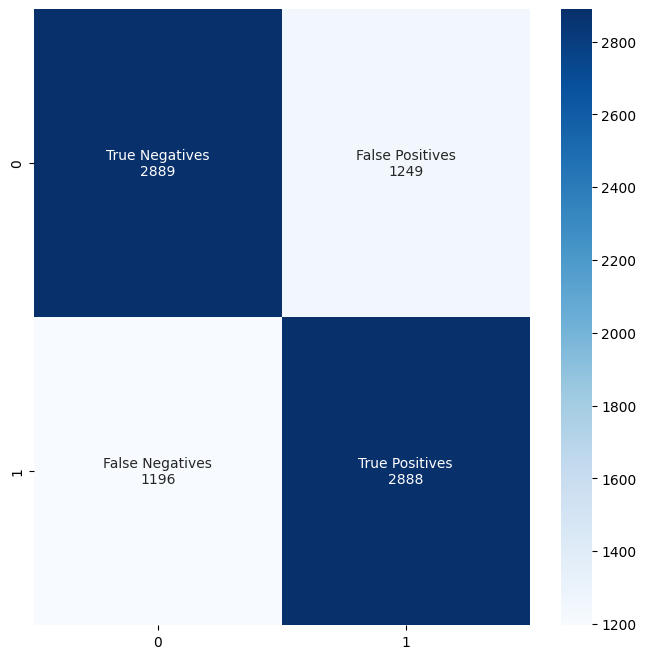

,Feature,Importance
7,instrumentalness,0.224065
6,acousticness,0.110048
0,danceability,0.098779
5,speechiness,0.079303
1,energy,0.073796
11,duration_ms,0.070819
3,loudness,0.060902
9,valence,0.059001
10,tempo,0.056985
13,chorus_hit,0.051110


In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=2022)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report_classification_performance(y_test, y_pred)
report_accuracy_performance(y_test, y_pred)
report_auc_performance(y_test, y_pred)
plot_conf_mat(y_test, y_pred)
feature_importance(model)

# Random Forest Classification

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4138
           1       0.76      0.84      0.80      4084

    accuracy                           0.79      8222
   macro avg       0.79      0.79      0.79      8222
weighted avg       0.79      0.79      0.79      8222

Accuracy score: 0.7884942836292873
AUC score: 0.7888406418332466


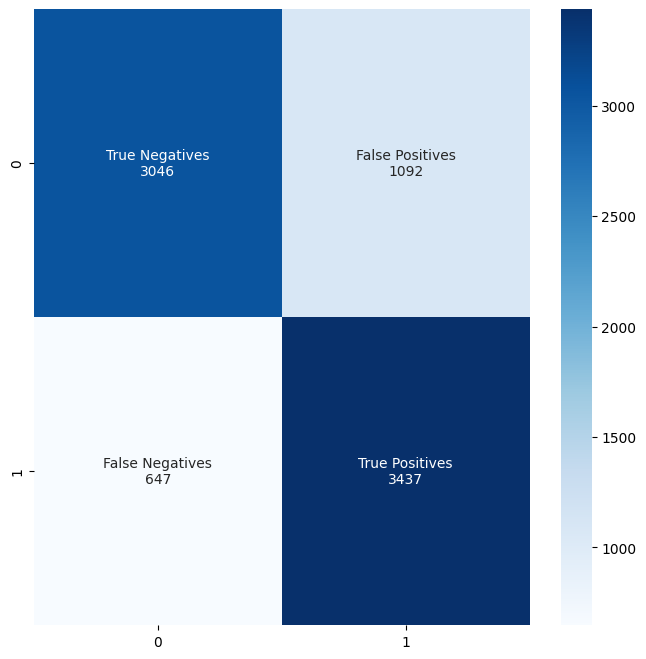

,Feature,Importance
7,instrumentalness,0.169261
6,acousticness,0.109541
0,danceability,0.102542
1,energy,0.083614
3,loudness,0.075848
5,speechiness,0.075036
11,duration_ms,0.074142
9,valence,0.068757
10,tempo,0.053791
8,liveness,0.051474


In [24]:
from sklearn.ensemble import RandomForestClassifier
del model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report_classification_performance(y_test, y_pred)
report_accuracy_performance(y_test, y_pred)
report_auc_performance(y_test, y_pred)
plot_conf_mat(y_test, y_pred)
feature_importance(model)

# Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      4138
           1       0.74      0.85      0.79      4084

    accuracy                           0.78      8222
   macro avg       0.78      0.78      0.77      8222
weighted avg       0.78      0.78      0.77      8222

Accuracy score: 0.7760885429335928
AUC score: 0.7765861448016024


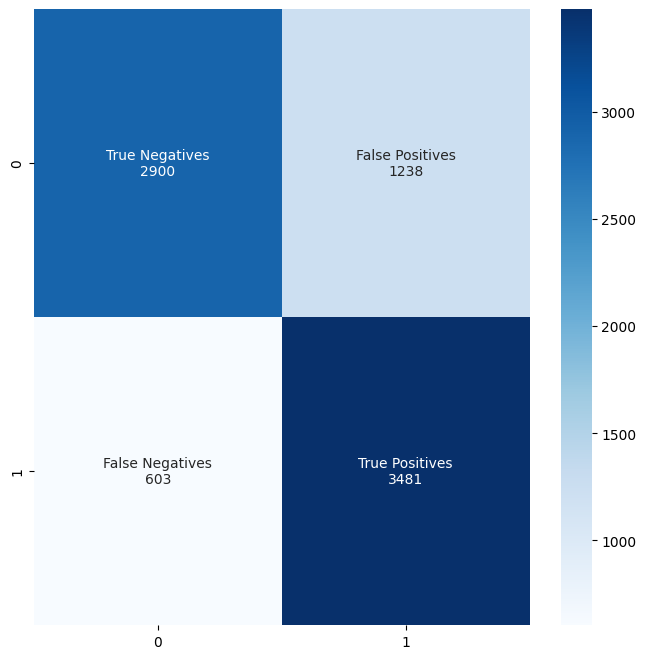

,Feature,Importance
7,instrumentalness,0.466389
6,acousticness,0.147650
0,danceability,0.125504
5,speechiness,0.075684
11,duration_ms,0.054561
1,energy,0.046567
3,loudness,0.026262
9,valence,0.025838
4,mode,0.012435
14,sections,0.005331


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

del model
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report_classification_performance(y_test, y_pred)
report_accuracy_performance(y_test, y_pred)
report_auc_performance(y_test, y_pred)
plot_conf_mat(y_test, y_pred)
feature_importance(model)

# XGBoost

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      4138
           1       0.73      0.85      0.79      4084

    accuracy                           0.77      8222
   macro avg       0.78      0.77      0.77      8222
weighted avg       0.78      0.77      0.77      8222

Accuracy score: 0.7732911700316225
AUC score: 0.773821403498972


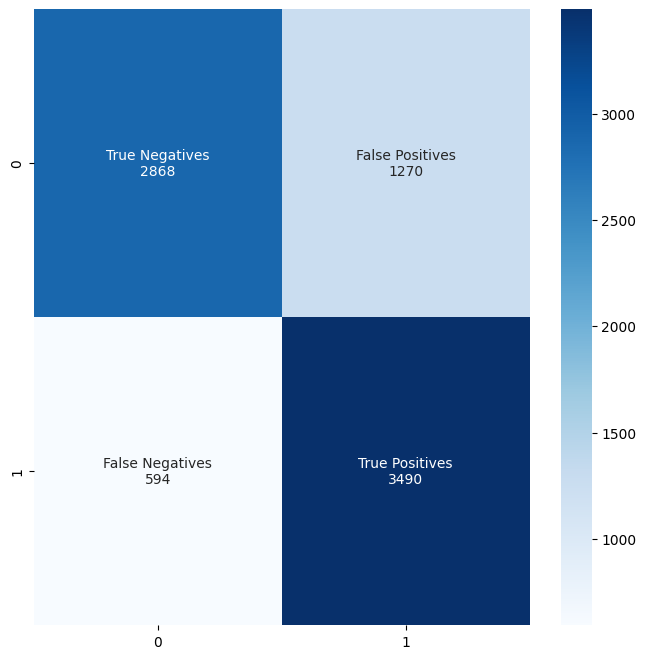

,Feature,Importance
7,instrumentalness,0.461840
0,danceability,0.105377
6,acousticness,0.081255
3,loudness,0.071259
11,duration_ms,0.051146
5,speechiness,0.049911
1,energy,0.044316
4,mode,0.036632
9,valence,0.028367
14,sections,0.025559


In [26]:
from xgboost import XGBClassifier

del model
model = XGBClassifier(n_estimators=200, max_depth=2, learning_rate=0.1, objective='binary:logistic')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report_classification_performance(y_test, y_pred)
report_accuracy_performance(y_test, y_pred)
report_auc_performance(y_test, y_pred)
plot_conf_mat(y_test, y_pred)
feature_importance(model)